In [6]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


random_state = 27

In [2]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(f'data/{category}'): #path to the folders with data
            img = cv2.imread(f'data/{category}/{image_name}') #path to the folders
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

            img_array = cv2.resize(img, (150,150)) 

            img_lst.append(img_array)
            labels.append(index)
    return img_lst, labels

categories = ['disco', 'electro', 'folk', 'rap', 'rock'] 

img_lst, labels = load_images_and_labels(categories)




In [3]:
len(img_lst)

9311

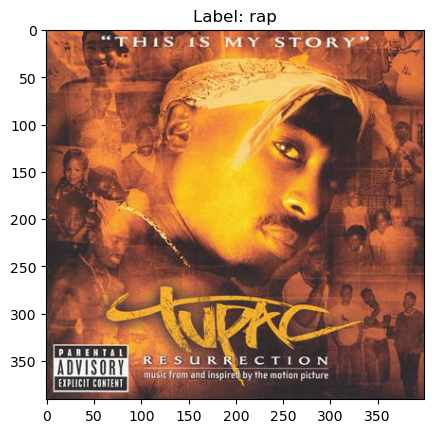

In [71]:
def display_image_by_filename(filename, category):
    img = mpimg.imread(f'data/{category}/{filename}')
    plt.imshow(img)
    plt.title(f'Label: {category}')
    plt.show()

# Use the function
display_image_by_filename('0_219.jpg', 'rap')

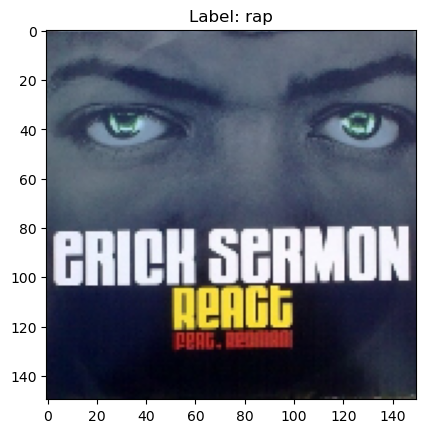

In [65]:
# Choose an image index
image_index = 6202

# Show image and label
plt.imshow(img_lst[image_index])
plt.title(f'Label: {categories[labels[image_index]]}')
plt.show()

In [7]:
images = np.array(img_lst) / 255.0 #normalization #pretrenowany model nie normalizujemy 
labels = to_categorical(labels)  #one hot encoding


In [8]:
images

array([[[[0.51764706, 0.39215686, 0.42745098],
         [0.50196078, 0.35294118, 0.39607843],
         [0.51764706, 0.35294118, 0.4       ],
         ...,
         [0.51372549, 0.36470588, 0.39607843],
         [0.51764706, 0.36862745, 0.39607843],
         [0.5254902 , 0.35686275, 0.39215686]],

        [[0.57254902, 0.43529412, 0.4745098 ],
         [0.58823529, 0.42745098, 0.4745098 ],
         [0.59607843, 0.41960784, 0.47058824],
         ...,
         [0.57254902, 0.41568627, 0.44705882],
         [0.59215686, 0.43529412, 0.46666667],
         [0.62745098, 0.44313725, 0.48235294]],

        [[0.6       , 0.44705882, 0.49019608],
         [0.58431373, 0.41176471, 0.4627451 ],
         [0.60784314, 0.41176471, 0.46666667],
         ...,
         [0.59215686, 0.42745098, 0.45882353],
         [0.59215686, 0.42352941, 0.45882353],
         [0.62352941, 0.42352941, 0.47058824]],

        ...,

        [[0.61176471, 0.49019608, 0.53333333],
         [0.61568627, 0.4745098 , 0.50980392]

In [9]:
labels

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [11]:
y_train.sum(axis=0)

array([1423., 1518., 1530., 1456., 1521.], dtype=float32)

In [12]:
y_test.sum(axis=0)

array([360., 346., 370., 397., 390.], dtype=float32)

In [13]:
print("x_train shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)


print("x_test shape: ", x_test.shape)
print("y_test.shape: ", y_test.shape)

#print("x_val shape: ", x_val.shape)
#print("y_val.shape: ", y_val.shape)

x_train shape:  (7448, 150, 150, 3)
y_train.shape:  (7448, 5)
x_test shape:  (1863, 150, 150, 3)
y_test.shape:  (1863, 5)


In [21]:
model = Sequential()

# Add model layers
# Convolution layer to extract features from the input image, and then create 32 5x5 ReLu convoluted features
# The input shape is the (150, 150, 3) because the images are 150x150 pixels and have three color channels.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Flatten layer to flatten the 2D arrays to 1D array before building the fully connected layers
model.add(Flatten())

# Add layers
model.add(Dense(64, activation='relu')) #do 16
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(256, activation='relu'))

# Add the output layer with 5 units and a softmax activation function
model.add(Dense(5, activation='softmax'))


In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 74, 74, 64)        18496     
                                                                 
 conv2d_26 (Conv2D)          (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [36]:
#model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
from keras.optimizers import Adam

# Set initial learning rate and decay
learning_rate = 0.0001
num_epochs = 20
decay_rate = learning_rate / num_epochs

# Create an Adam optimizer with the set learning rate and decay
optimizer = Adam(lr=learning_rate, decay=decay_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])





/Users/katarzyna/opt/anaconda3/envs/DL_fresh/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [37]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [38]:
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/20
  7/233 [..............................] - ETA: 6:09 - loss: 0.6394 - accuracy: 0.7723

KeyboardInterrupt: 

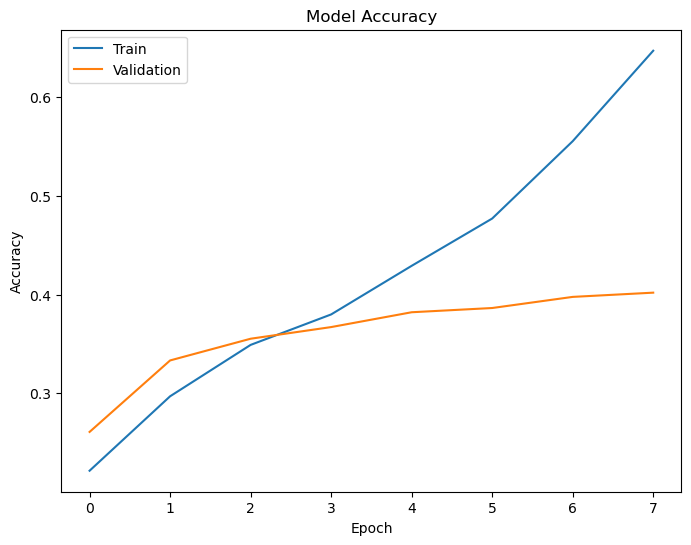

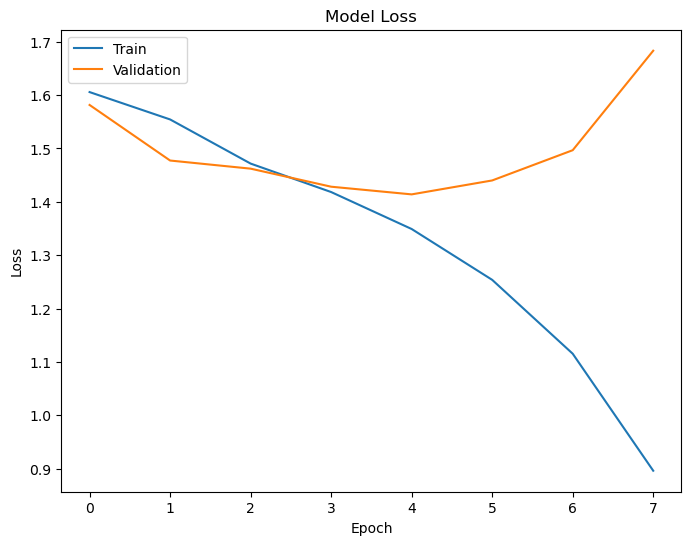

In [34]:
# summarize history for accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [35]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

59/59 [==============================] - 35s 595ms/step
              precision    recall  f1-score   support

           0       0.33      0.48      0.39       360
           1       0.49      0.39      0.44       346
           2       0.32      0.39      0.35       370
           3       0.67      0.50      0.57       397
           4       0.32      0.25      0.28       390

    accuracy                           0.40      1863
   macro avg       0.43      0.40      0.41      1863
weighted avg       0.43      0.40      0.41      1863



History:


weighted avg 0.29, 0.31, .36, .37, .41